# Kernel Principal Component Analysis ( KPCA )

In [ ]:
import numpy as np

In [ ]:
D = np.matrix([[28.11, 0.2, 0.03, 49.54],
               [39.28, 0.3, 0.135, 251.2],
               [188.5, 0.097, 0.396, 4254],
               [250, 2.87, 0.053, 0.22],
               [0.123, 4.88, 0.81, 1.06,],
               [0.34, 22, 0.03, 1.252],
               [0.43, 542, 36, 0.3],
               [1.52, 261, 0.29, 3.71]])

alpha = 0.99

# n -> number of rows , d -> number of columns
n, d = D.shape

In [ ]:
def kernel(data, type="linear", input=None, c=None):
  import numpy as np
  
  # convert to numpy array
  D = np.asarray(data, dtype='float')
  # convert to numpy matrix
  D = D.view(dtype='float', type=np.matrix)

  # n -> number of rows , d -> number of columns
  n, d = D.shape

  K = np.full((n, n), 0, dtype='float')
  if type == "linear":
    if (input != None) or (c != None):
      print("Kernel type \"linear\" do not have any of \'q\' or \'c\' parameters")
      return
    for i in range(0, n):
      for j in range(0, n):
        K[i, j] = K[j, i] = np.matmul(D[i,:], D[j,:].transpose())[0,0]
  
  elif type == "polynomial":
    # homogeneous Polynomial Kernel ( linear kernel ^ q )
    if input == None:
      print("Kernel type \"homogeneous Polynomial\" must have a \'q' parameter")
      return
    if c != None:
      print("Kernel type \"homogeneous Polynomial\" do not have a \'c' parameter")
      return
    # q = input
    for i in range(0, n):
      for j in range(0, n):
        K[i, j] = K[j, i] = np.power(np.matmul(D[i,:], D[j,:].transpose())[0,0], input)

  elif type == "inhomogeneous polynomial":
    # inhomogeneous polynomial kernel ( [c + linear kernel] ^ q )
    if (input == None) or (c == None):
      print("Kernel type \"inhomogeneous Polynomial\" must have both \'q\' and \'c\' parameters")
      return
    # q = input
    for i in range(0, n):
      for j in range(0, n):
        K[i, j] = K[j, i] = np.power(np.matmul(D[i,:], D[j,:].transpose())[0,0] + c, input)

  elif type == "gaussian":
    if input == None:
      print("Kernel type \"gaussian\" must have a \'sigma' parameter")
      return
    if c != None:
      print("Kernel type \"gaussian\" do not have a \'c' parameter")
      return
    # sigma = input
    for i in range(0, n):
      for j in range(0, n):
        K[i, j] = K[j, i] = np.exp(-np.power(np.linalg.norm(D[i,:] - D[j,:], ord=2), 2) / (2 * np.power(input, 2)))
    

  return K

In [ ]:
k = kernel(D, type="linear")
k

In [ ]:
k = kernel(D, type="polynomial", input = 2)
k

In [ ]:
k = kernel(D, type="gaussian", input = 10)
k

array([[1.00000000e+000, 2.64413942e-089, 0.00000000e+000,
        6.16134972e-113, 1.40162013e-007, 1.69886694e-008,
        0.00000000e+000, 1.61200915e-154],
       [2.64413942e-089, 1.00000000e+000, 0.00000000e+000,
        6.06454574e-234, 5.68767555e-140, 1.05736120e-140,
        0.00000000e+000, 2.06681295e-284],
       [0.00000000e+000, 0.00000000e+000, 1.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000],
       [6.16134972e-113, 6.06454574e-234, 0.00000000e+000,
        1.00000000e+000, 2.54060758e-136, 7.15969567e-137,
        0.00000000e+000, 1.63725834e-279],
       [1.40162013e-007, 5.68767555e-140, 0.00000000e+000,
        2.54060758e-136, 1.00000000e+000, 2.30170771e-001,
        0.00000000e+000, 3.44241670e-143],
       [1.69886694e-008, 1.05736120e-140, 0.00000000e+000,
        7.15969567e-137, 2.30170771e-001, 1.00000000e+000,
        0.00000000e+000, 8.85186175e-125],
       [0.00000000e+000, 0.0000000

In [ ]:
# 2. center the kernel matrix
temp = np.eye(n, dtype=float) - (1/n) * np.full((n, n), 1, dtype='float')
k_bar = np.linalg.multi_dot([temp, k, temp])
k_bar

array([[ 0.8821928 , -0.11780718, -0.11780718, -0.11780718, -0.1465784 ,
        -0.14657851, -0.11780718, -0.11780718],
       [-0.11780718,  0.88219284, -0.11780716, -0.11780716, -0.14657852,
        -0.14657851, -0.11780716, -0.11780716],
       [-0.11780718, -0.11780716,  0.88219284, -0.11780716, -0.14657852,
        -0.14657851, -0.11780716, -0.11780716],
       [-0.11780718, -0.11780716, -0.11780716,  0.88219284, -0.14657852,
        -0.14657851, -0.11780716, -0.11780716],
       [-0.1465784 , -0.14657852, -0.14657852, -0.14657852,  0.82465011,
         0.0548209 , -0.14657852, -0.14657852],
       [-0.14657851, -0.14657851, -0.14657851, -0.14657851,  0.0548209 ,
         0.82465014, -0.14657851, -0.14657851],
       [-0.11780718, -0.11780716, -0.11780716, -0.11780716, -0.14657852,
        -0.14657851,  0.88219284, -0.11780716],
       [-0.11780718, -0.11780716, -0.11780716, -0.11780716, -0.14657852,
        -0.14657851, -0.11780716,  0.88219284]])

In [ ]:
# 3 & 4. compute eigenvalues & eigenvectors
# eta_i -> eigen values ,  C_i -> eigen vectors
eta_i, C_i = np.linalg.eig(k_bar)

# '-1 *' for sorting in descending order
ind = np.argsort(-1 * e)

eta_i = eta_i[ind]
C_i = C_i[:,ind]

print("eigen values: ")
print(eta_i)
print("eigen vectors: ")
print(C_i)

eigen values: 
[1.11022302e-16 1.00000000e+00 1.17262804e+00 7.69829229e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]
eigen vectors: 
[[ 3.53553391e-01  9.12871033e-01  2.04123681e-01  3.24343213e-07
   1.16886235e-04  2.52700516e-03 -1.50420383e-03  6.07327695e-05]
 [ 3.53553391e-01 -1.82574082e-01  2.04124238e-01 -5.40571833e-08
   2.20984116e-02 -8.04478555e-01  2.03520261e-01  1.25640974e-01]
 [ 3.53553391e-01 -1.82574082e-01  2.04124238e-01 -5.40571824e-08
  -5.95040396e-01  4.50998245e-01  3.88229497e-01 -5.11582480e-01]
 [ 3.53553391e-01 -1.82574082e-01  2.04124238e-01 -5.40571855e-08
   7.87832115e-01  3.71832038e-01  2.28480487e-01 -3.69479949e-01]
 [ 3.53553391e-01 -6.73780915e-08 -6.12372404e-01 -7.07106808e-01
  -8.62846192e-12 -1.86515986e-10  1.11023906e-10 -4.48253519e-12]
 [ 3.53553391e-01 -5.55890936e-07 -6.12372467e-01  7.07106754e-01
  -7.11766870e-11 -1.53881431e-09  9.15982068e-10 -3.69833659e-11]
 [ 3.53553391e-01 -1.82574082e-01  2.04124238e-0

In [ ]:
# 5. compute variance for each component
lambda_i = eta_i / n
lambda_i

array([1.38777878e-17, 1.25000000e-01, 1.46578505e-01, 9.62286537e-02,
       1.25000000e-01, 1.25000000e-01, 1.25000000e-01, 1.25000000e-01])

In [ ]:
# 6. Ensure that ( C_i' * C_i = 1 )
C_i = np.multiply(np.sqrt(1/eta_i), C_i)
C_i

array([[ 3.35544320e+07,  9.12871033e-01,  1.88500824e-01,
         3.69664390e-07,  1.16886235e-04,  2.52700516e-03,
        -1.50420383e-03,  6.07327695e-05],
       [ 3.35544320e+07, -1.82574082e-01,  1.88501339e-01,
        -6.16107101e-08,  2.20984116e-02, -8.04478555e-01,
         2.03520261e-01,  1.25640974e-01],
       [ 3.35544320e+07, -1.82574082e-01,  1.88501339e-01,
        -6.16107091e-08, -5.95040396e-01,  4.50998245e-01,
         3.88229497e-01, -5.11582480e-01],
       [ 3.35544320e+07, -1.82574082e-01,  1.88501339e-01,
        -6.16107126e-08,  7.87832115e-01,  3.71832038e-01,
         2.28480487e-01, -3.69479949e-01],
       [ 3.35544320e+07, -6.73780915e-08, -5.65503731e-01,
        -8.05912367e-01, -8.62846192e-12, -1.86515986e-10,
         1.11023906e-10, -4.48253519e-12],
       [ 3.35544320e+07, -5.55890936e-07, -5.65503789e-01,
         8.05912306e-01, -7.11766870e-11, -1.53881431e-09,
         9.15982068e-10, -3.69833659e-11],
       [ 3.35544320e+07, -1.825740

In [ ]:
# 7. fraction of total variance (f(r))
# f(r)
f_r = np.full((d), 1, dtype='complex')
for r in range(0, d):
  f_r[r] = lambda_i[:r+1].sum(axis=0, dtype='complex') / lambda_i.sum(axis=0, dtype='complex')

f_r

array([1.59917877e-17+0.j, 1.44041218e-01+0.j, 3.12947989e-01+0.j,
       4.23835128e-01+0.j])

In [ ]:
# 8. choose dimensionality
# r = min {r' | f(r') >= alpha}
ind = np.where(f_r >= alpha)
ind = ind[0]
ind
# if 'ind' is empty
if ind.size == 0:
  r = d
else:
  # because the index starts at 0 we need to increment by 1
  r = ind[0] + 1

r

4

In [ ]:
# 9. Reduced basis ( C_r )
C_r = C_i[:, :r]
C_r

array([[ 3.35544320e+07,  9.12871033e-01,  1.88500824e-01,
         3.69664390e-07],
       [ 3.35544320e+07, -1.82574082e-01,  1.88501339e-01,
        -6.16107101e-08],
       [ 3.35544320e+07, -1.82574082e-01,  1.88501339e-01,
        -6.16107091e-08],
       [ 3.35544320e+07, -1.82574082e-01,  1.88501339e-01,
        -6.16107126e-08],
       [ 3.35544320e+07, -6.73780915e-08, -5.65503731e-01,
        -8.05912367e-01],
       [ 3.35544320e+07, -5.55890936e-07, -5.65503789e-01,
         8.05912306e-01],
       [ 3.35544320e+07, -1.82574082e-01,  1.88501339e-01,
        -6.16107105e-08],
       [ 3.35544320e+07, -1.82574082e-01,  1.88501339e-01,
        -6.16107106e-08]])

In [ ]:
# 10. reduced dimensionality data
# A
A = np.full((n, r), 0, dtype='complex')

for i in range(0, n):
  a = np.matmul(C_r.transpose(), k_bar[i, :].transpose())
  A[i, :] = a.transpose()

A

array([[ 2.23517418e-08+0.j,  9.12871033e-01+0.j,  2.21041352e-01+0.j,
         2.84578452e-07+0.j],
       [-1.49011612e-08+0.j, -1.82574082e-01+0.j,  2.21041955e-01+0.j,
        -4.74297254e-08+0.j],
       [-3.72529030e-09+0.j, -1.82574082e-01+0.j,  2.21041955e-01+0.j,
        -4.74297243e-08+0.j],
       [-7.45058060e-09+0.j, -1.82574082e-01+0.j,  2.21041955e-01+0.j,
        -4.74297278e-08+0.j],
       [ 7.45058060e-09+0.j, -6.73780914e-08+0.j, -6.63125531e-01+0.j,
        -6.20414897e-01+0.j],
       [ 5.58793545e-09+0.j, -5.55890935e-07+0.j, -6.63125598e-01+0.j,
         6.20414849e-01+0.j],
       [-1.86264515e-09+0.j, -1.82574082e-01+0.j,  2.21041955e-01+0.j,
        -4.74297257e-08+0.j],
       [-1.11758709e-08+0.j, -1.82574082e-01+0.j,  2.21041955e-01+0.j,
        -4.74297258e-08+0.j]])

In [ ]:
import matplotlib.pyplot as plt

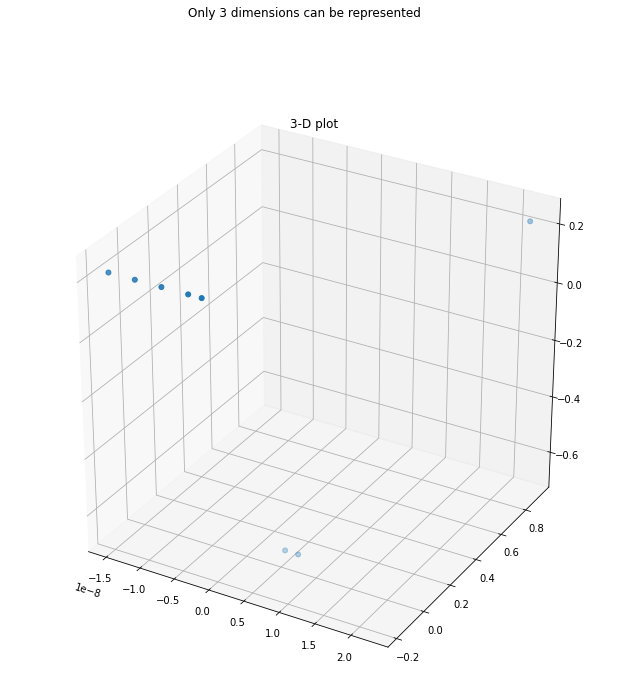

In [ ]:
# plot result
if r == 1:
  # 1-D plot
  fig1D, ax1D = plt.subplots()
  ax1D.hlines(1, np.amin(A.real) - 1, np.amax(A.real) + 1)  # Draw a horizontal line
  plt.xlim(np.amin(A.real) - 1, np.amax(A.real) + 1)
  plt.ylim(0.5,1.5)
  
  y = np.ones(np.shape(A))   # Make all y values the same
  ax1D.plot(A.real,y,'|',ms = 40)  # Plot a line at each location specified in 'A'
  ax1D.set_title('1-D plot')
  #plt.axis('off')
  plt.show()

elif r == 2:
  # 2-D plot
  fig2D, ax2D = plt.subplots()
  ax2D.plot(A.real[:,0], A.real[:,1], 'o')
  ax2D.grid()
  ax2D.set_title('2-D plot')
  plt.show()

elif r >= 3:
  # 3-D plot
  fig3D = plt.figure(figsize=(11,11))
  ax3D = fig3D.add_subplot(projection='3d')
  ax3D.scatter(A.real[:,0], A.real[:,1], A.real[:,2], marker=".", s=100)
  ax3D.set_title('3-D plot')
  if r > 3:
    fig3D.suptitle('Only 3 dimensions can be represented')
  #ax3D.view_init(20, 170)
  plt.show()

# KPCA Functions

In [ ]:
def kernel(data, type="linear", input=None, c=None):
  import numpy as np
  
  # convert to numpy array
  D = np.asarray(data, dtype='float')
  # convert to numpy matrix
  D = D.view(dtype='float', type=np.matrix)

  # n -> number of rows , d -> number of columns
  n, d = D.shape

  K = np.full((n, n), 0, dtype='float')
  if type == "linear":
    if (input != None) or (c != None):
      print("Kernel type \"linear\" do not have any of \'q\' or \'c\' parameters")
      return
    for i in range(0, n):
      for j in range(0, n):
        K[i, j] = K[j, i] = np.matmul(D[i,:], D[j,:].transpose())[0,0]
  
  elif type == "polynomial":
    # homogeneous Polynomial Kernel ( linear kernel ^ q )
    if input == None:
      print("Kernel type \"homogeneous Polynomial\" must have a \'q' parameter")
      return
    if c != None:
      print("Kernel type \"homogeneous Polynomial\" do not have a \'c' parameter")
      return
    # q = input
    for i in range(0, n):
      for j in range(0, n):
        K[i, j] = K[j, i] = np.power(np.matmul(D[i,:], D[j,:].transpose())[0,0], input)

  elif type == "inhomogeneous polynomial":
    # inhomogeneous polynomial kernel ( [c + linear kernel] ^ q )
    if (input == None) or (c == None):
      print("Kernel type \"inhomogeneous Polynomial\" must have both \'q\' and \'c\' parameters")
      return
    # q = input
    for i in range(0, n):
      for j in range(0, n):
        K[i, j] = K[j, i] = np.power(np.matmul(D[i,:], D[j,:].transpose())[0,0] + c, input)

  elif type == "gaussian":
    if input == None:
      print("Kernel type \"gaussian\" must have a \'sigma' parameter")
      return
    if c != None:
      print("Kernel type \"gaussian\" do not have a \'c' parameter")
      return
    # sigma = input
    for i in range(0, n):
      for j in range(0, n):
        K[i, j] = K[j, i] = np.exp(-np.power(np.linalg.norm(D[i,:] - D[j,:], ord=2), 2) / (2 * np.power(input, 2)))
    

  return K

In [ ]:
def plotResult(A, r):
  import numpy as np
  import matplotlib.pyplot as plt
  
  # plot result
  if r == 1:
    # 1-D plot
    fig1D, ax1D = plt.subplots()
    ax1D.hlines(1, np.amin(A.real) - 1, np.amax(A.real) + 1)  # Draw a horizontal line
    plt.xlim(np.amin(A.real) - 1, np.amax(A.real) + 1)
    plt.ylim(0.5,1.5)
  
    y = np.ones(np.shape(A))   # Make all y values the same
    ax1D.plot(A.real,y,'|',ms = 40)  # Plot a line at each location specified in 'A'
    ax1D.set_title('1-D plot')
    #plt.axis('off')
    plt.show()

  elif r == 2:
    # 2-D plot
    fig2D, ax2D = plt.subplots()
    ax2D.plot(A.real[:,0], A.real[:,1], 'o')
    ax2D.grid()
    ax2D.set_title('2-D plot')
    plt.show()

  elif r >= 3:
    # 3-D plot
    fig3D = plt.figure(figsize=(11,11))
    ax3D = fig3D.add_subplot(projection='3d')
    ax3D.scatter(A.real[:,0], A.real[:,1], A.real[:,2], marker=".", s=100)
    ax3D.set_title('3-D plot')
    if r > 3:
      fig3D.suptitle('Only 3 dimensions can be represented')
    #ax3D.view_init(20, 170)
    plt.show()

In [ ]:
# All in one function
def kpca(D, alpha, type="linear", input=None, c=None):
  import numpy as np
  
  if type == "linear":
    k = kernel(D, type="linear", input=input, c=c)
  
  elif type == "polynomial":
    # homogeneous Polynomial Kernel
    k = kernel(D, type="polynomial", input=input, c=c)

  elif type == "inhomogeneous polynomial":
    # inhomogeneous polynomial kernel
    k = kernel(D, type="inhomogeneous polynomial", input=input, c=c)

  elif type == "gaussian":
    k = kernel(D, type="gaussian", input=input, c=c)
    


  # convert to numpy array
  k = np.asarray(k, dtype='complex')
  # convert to numpy matrix
  k = k.view(dtype='complex', type=np.matrix)

  # n -> number of rows , d -> number of columns
  n, d = D.shape

  # 2. center the kernel matrix
  temp = np.eye(n, dtype=float) - (1/n) * np.full((n, n), 1, dtype='float')
  k_bar = np.linalg.multi_dot([temp, k, temp])
  
  # 3 & 4. compute eigenvalues & eigenvectors
  # eta_i -> eigen values ,  C_i -> eigen vectors
  eta_i, C_i = np.linalg.eig(k_bar)

  # '-1 *' for sorting in descending order
  ind = np.argsort(-1 * e)

  eta_i = eta_i[ind]
  C_i = C_i[:,ind]

  # 5. compute variance for each component
  lambda_i = eta_i / n
  
  # 6. Ensure that ( C_i' * C_i = 1 )
  C_i = np.multiply(np.sqrt(1/eta_i), C_i)

  # 7. fraction of total variance (f(r))
  # f(r)
  f_r = np.full((d), 1, dtype='complex')
  for r in range(0, d):
    f_r[r] = lambda_i[:r+1].sum(axis=0, dtype='complex') / lambda_i.sum(axis=0, dtype='complex')

  # 8. choose dimensionality
  # r = min {r' | f(r') >= alpha}
  ind = np.where(f_r >= alpha)
  ind = ind[0]

  # if 'ind' is empty
  if ind.size == 0:
    r = d
  else:
    # because the index starts at 0 we need to increment by 1
    r = ind[0] + 1
  
  # 9. Reduced basis ( C_r )
  C_r = C_i[:, :r]
  
  # 10. reduced dimensionality data
  # A
  A = np.full((n, r), 0, dtype='complex')

  for i in range(0, n):
    a = np.matmul(C_r.transpose(), k_bar[i, :].transpose())
    A[i, :] = a.transpose()
  
  plotResult(A, r)

  return  A, C_r, r, f_r, lambda_i, eta_i, C_i, k_bar, k

# Testing Functions

In [ ]:
import numpy as np

D = np.matrix([[28.11, 0.2, 0.03, 49.54],
               [39.28, 0.3, 0.135, 251.2],
               [188.5, 0.097, 0.396, 4254],
               [250, 2.87, 0.053, 0.22],
               [0.123, 4.88, 0.81, 1.06,],
               [0.34, 22, 0.03, 1.252],
               [0.43, 542, 36, 0.3],
               [1.52, 261, 0.29, 3.71]])

alpha = 0.9

linear Kernel

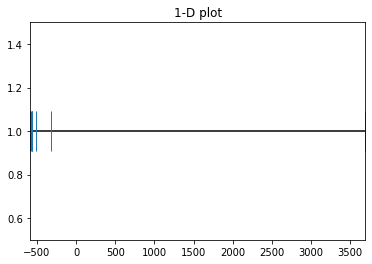

In [ ]:
A, C_r, r, f_r, lambda_i, eta_i, C_i, k_bar, k = kpca(D, alpha, type="linear")

In [ ]:
print("\"Kernel matrix\"")
print(k)
print("\n\"k_bar\"")
print(k_bar)
print("\n\"eigen values\"")
print(eta_i)
print("\n\"eigen vectors ( C_i' * C_i = 1 )\"")
print(C_i)
print("\n\"variance for each component\"")
print(lambda_i)
print("\n\"r\"")
print(r)
print("\n\"f_r\"")
print(f_r)
print("\n\"C_r\"")
print(C_r)
print("\n\"A\"")
print(A)

"Kernel matrix"
[[3.24442460e+03+0.j 1.35486728e+04+0.j 2.16041926e+05+0.j
  7.03897439e+03+0.j 5.69702300e+01+0.j 7.59823800e+01+0.j
  1.36429300e+02+0.j 2.78729300e+02+0.j]
 [1.35486728e+04+0.j 6.46444666e+04+0.j 1.07600916e+06+0.j
  9.87613215e+03+0.j 2.72676790e+02+0.j 3.34461650e+02+0.j
  2.59710400e+02+0.j 1.06999675e+03+0.j]
 [2.16041926e+05+0.j 1.07600916e+06+0.j 1.81320484e+07+0.j
  4.80611794e+04+0.j 4.53321962e+03+0.j 5.39224388e+03+0.j
  1.42408500e+03+0.j 1.60942918e+04+0.j]
 [7.03897439e+03+0.j 9.87613215e+03+0.j 4.80611794e+04+0.j
  6.25082881e+04+0.j 4.50317300e+01+0.j 1.48417030e+02+0.j
  1.66501400e+03+0.j 1.12990157e+03+0.j]
 [5.69702300e+01+0.j 2.72676790e+02+0.j 4.53321962e+03+0.j
  4.50317300e+01+0.j 2.56092290e+01+0.j 1.08753240e+02+0.j
  2.67449089e+03+0.j 1.27803446e+03+0.j]
 [7.59823800e+01+0.j 3.34461650e+02+0.j 5.39224388e+03+0.j
  1.48417030e+02+0.j 1.08753240e+02+0.j 4.85684004e+02+0.j
  1.19256018e+04+0.j 5.74717042e+03+0.j]
 [1.36429300e+02+0.j 2.5971040

Polynomial Kernel

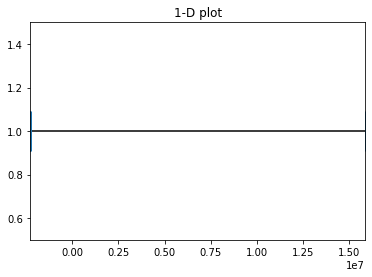

In [ ]:
q = 2 # quadratic
A, C_r, r, f_r, lambda_i, eta_i, C_i, k_bar, k = kpca(D, alpha, type="polynomial", input = q)

In [ ]:
print("\"Kernel matrix\"")
print(k)
print("\n\"k_bar\"")
print(k_bar)
print("\n\"eigen values\"")
print(eta_i)
print("\n\"eigen vectors ( C_i' * C_i = 1 )\"")
print(C_i)
print("\n\"variance for each component\"")
print(lambda_i)
print("\n\"r\"")
print(r)
print("\n\"f_r\"")
print(f_r)
print("\n\"C_r\"")
print(C_r)
print("\n\"A\"")
print(A)

"Kernel matrix"
[[1.05262910e+07+0.j 1.83566536e+08+0.j 4.66741139e+10+0.j
  4.95471605e+07+0.j 3.24560711e+03+0.j 5.77332207e+03+0.j
  1.86129539e+04+0.j 7.76900227e+04+0.j]
 [1.83566536e+08+0.j 4.17890707e+09+0.j 1.15779572e+12+0.j
  9.75379863e+07+0.j 7.43526318e+04+0.j 1.11864595e+05+0.j
  6.74494919e+04+0.j 1.14489305e+06+0.j]
 [4.66741139e+10+0.j 1.15779572e+12+0.j 3.28771180e+14+0.j
  2.30987696e+09+0.j 2.05500801e+07+0.j 2.90762941e+07+0.j
  2.02801809e+06+0.j 2.59026230e+08+0.j]
 [4.95471605e+07+0.j 9.75379863e+07+0.j 2.30987696e+09+0.j
  3.90728608e+09+0.j 2.02785671e+03+0.j 2.20276148e+04+0.j
  2.77227162e+06+0.j 1.27667756e+06+0.j]
 [3.24560711e+03+0.j 7.43526318e+04+0.j 2.05500801e+07+0.j
  2.02785671e+03+0.j 6.55832610e+02+0.j 1.18272672e+04+0.j
  7.15290152e+06+0.j 1.63337208e+06+0.j]
 [5.77332207e+03+0.j 1.11864595e+05+0.j 2.90762941e+07+0.j
  2.20276148e+04+0.j 1.18272672e+04+0.j 2.35888952e+05+0.j
  1.42219978e+08+0.j 3.30299678e+07+0.j]
 [1.86129539e+04+0.j 6.7449491

Gaussian Kernel

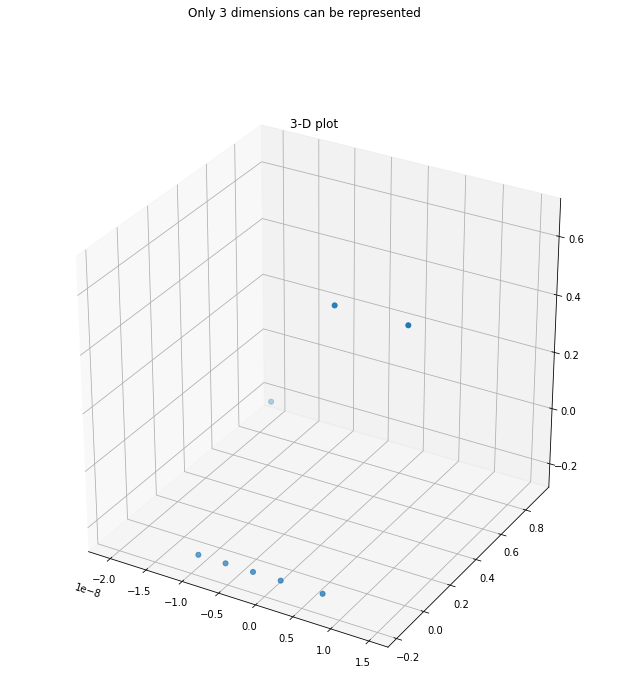

In [ ]:
sigma = 10
A, C_r, r, f_r, lambda_i, eta_i, C_i, k_bar, k = kpca(D, alpha, type="gaussian", input = sigma)

In [ ]:
print("\"Kernel matrix\"")
print(k)
print("\n\"k_bar\"")
print(k_bar)
print("\n\"eigen values\"")
print(eta_i)
print("\n\"eigen vectors ( C_i' * C_i = 1 )\"")
print(C_i)
print("\n\"variance for each component\"")
print(lambda_i)
print("\n\"r\"")
print(r)
print("\n\"f_r\"")
print(f_r)
print("\n\"C_r\"")
print(C_r)
print("\n\"A\"")
print(A)

"Kernel matrix"
[[1.00000000e+000+0.j 2.64413942e-089+0.j 0.00000000e+000+0.j
  6.16134972e-113+0.j 1.40162013e-007+0.j 1.69886694e-008+0.j
  0.00000000e+000+0.j 1.61200915e-154+0.j]
 [2.64413942e-089+0.j 1.00000000e+000+0.j 0.00000000e+000+0.j
  6.06454574e-234+0.j 5.68767555e-140+0.j 1.05736120e-140+0.j
  0.00000000e+000+0.j 2.06681295e-284+0.j]
 [0.00000000e+000+0.j 0.00000000e+000+0.j 1.00000000e+000+0.j
  0.00000000e+000+0.j 0.00000000e+000+0.j 0.00000000e+000+0.j
  0.00000000e+000+0.j 0.00000000e+000+0.j]
 [6.16134972e-113+0.j 6.06454574e-234+0.j 0.00000000e+000+0.j
  1.00000000e+000+0.j 2.54060758e-136+0.j 7.15969567e-137+0.j
  0.00000000e+000+0.j 1.63725834e-279+0.j]
 [1.40162013e-007+0.j 5.68767555e-140+0.j 0.00000000e+000+0.j
  2.54060758e-136+0.j 1.00000000e+000+0.j 2.30170771e-001+0.j
  0.00000000e+000+0.j 3.44241670e-143+0.j]
 [1.69886694e-008+0.j 1.05736120e-140+0.j 0.00000000e+000+0.j
  7.15969567e-137+0.j 2.30170771e-001+0.j 1.00000000e+000+0.j
  0.00000000e+000+0.j 8.8